In [7]:
from nnlearn.Network import *
from matplotlib import pyplot as plt
from matplotlib import image



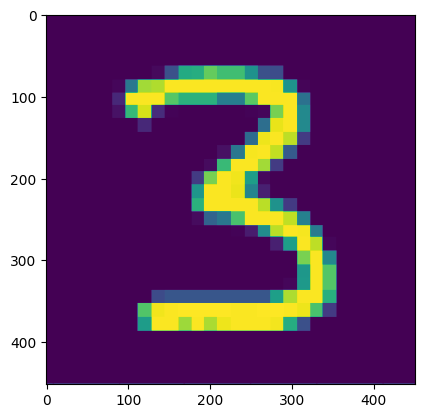

In [8]:
img = image.imread("digit_3.png")[:,:,0]
plt.imshow(img)
plt.show()

In [9]:
def image_to_tab(image):
    shape = image.shape
    x = []
    y = []

    for row in range(shape[0]):
        for col in range(shape[1]):

            x.append([row/shape[0], col/shape[1]])
            y.append(image[row,col])

    x = np.array(x)
    y = np.array(y)
    
    return (x, y)

In [10]:
class nn_image_compresser():
    def __init__(self, hidden_layers = 2, layer_width = 7):

        assert hidden_layers >= 1, "must have at least 1 hidden layer"
        assert layer_width >= 1, "layer width must be at least 1"

        layers = (
            [input_layer(size = 2)] +
            
            [connected_layer(num_neurons = layer_width, prev_neurons = 2),
             activation_layer(layer_width)] +
            
                

            [connected_layer(num_neurons = layer_width, prev_neurons = layer_width),
             activation_layer(layer_width)] * (hidden_layers - 1) +
            
            
            [connected_layer(num_neurons = 1, prev_neurons = layer_width)]

            )
        
        self.network = test_net = network(layers)



    
    def fit(self, image, batch_size = None, epochs = 500, learn_coef = .3, verbose = True):

        x, y = image_to_tab(image)
    
        self.network.minibatch_fit(x, y, batch_size = batch_size, epochs = epochs, learn_coef = learn_coef, verbose = verbose)


    def create_image(self, width, height = None):
        
        if height == None: height = width

        predicted_image = np.zeros((width,height))

        for row in range(height):
            for col in range(width):

                prediction = self.network.predict(np.array([row/height, col/width]))
                predicted_image[row, col] = prediction

        return predicted_image
    




In [11]:
compresser = nn_image_compresser()


In [12]:
compresser.fit(img, batch_size = 10000, epochs = 10000, verbose = True)

--------------------
epoch: 1 
 loss: 1.2346
--------------------
epoch: 2001 
 loss: 1.2346
